
## Overview

This notebook will show you how to create and query a table or DataFrame that you uploaded to DBFS. [DBFS](https://docs.databricks.com/user-guide/dbfs-databricks-file-system.html) is a Databricks File System that allows you to store data for querying inside of Databricks. This notebook assumes that you have a file already inside of DBFS that you would like to read from.

This notebook is written in **Python** so the default cell type is Python. However, you can use different languages by using the `%LANGUAGE` syntax. Python, Scala, SQL, and R are all supported.

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator

In [0]:
# Initialize Spark session
spark = SparkSession.builder.appName("Iris Clustering").getOrCreate()

# File location and type
file_location = "/FileStore/tables/iris-2.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "false"
delimiter = ","
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

# The applied options are for CSV files
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

# Rename columns
for old_col, new_col in zip(df.columns, columns):
    df = df.withColumnRenamed(old_col, new_col)

# Remove first row
df = df.rdd.zipWithIndex().filter(lambda row: row[1] > 0).map(lambda row: row[0]).toDF(columns)

# Manually cast columns to correct types
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType, StringType

df = df.select(
    col("sepal_length").cast(DoubleType()),
    col("sepal_width").cast(DoubleType()),
    col("petal_length").cast(DoubleType()),
    col("petal_width").cast(DoubleType()),
    col("species").cast(StringType())  # Keep species as string
)

# Show inferred schema
df.printSchema()
display(df)

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- species: string (nullable = true)



sepal_length sepal_width petal_length petal_width species 5.1 3.5 1.4 0.2 setosa 4.9 3.0 1.4 0.2 setosa 4.7 3.2 1.3 0.2 setosa 4.6 3.1 1.5 0.2 setosa 5.0 3.6 1.4 0.2 setosa 5.4 3.9 1.7 0.4 setosa 4.6 3.4 1.4 0.3 setosa 5.0 3.4 1.5 0.2 setosa 4.4 2.9 1.4 0.2 setosa 4.9 3.1 1.5 0.1 setosa 5.4 3.7 1.5 0.2 setosa 4.8 3.4 1.6 0.2 setosa 4.8 3.0 1.4 0.1 setosa 4.3 3.0 1.1 0.1 setosa 5.8 4.0 1.2 0.2 setosa 5.7 4.4 1.5 0.4 setosa 5.4 3.9 1.3 0.4 setosa 5.1 3.5 1.4 0.3 setosa 5.7 3.8 1.7 0.3 setosa 5.1 3.8 1.5 0.3 setosa 5.4 3.4 1.7 0.2 setosa 5.1 3.7 1.5 0.4 setosa 4.6 3.6 1.0 0.2 setosa 5.1 3.3 1.7 0.5 setosa 4.8 3.4 1.9 0.2 setosa 5.0 3.0 1.6 0.2 setosa 5.0 3.4 1.6 0.4 setosa 5.2 3.5 1.5 0.2 setosa 5.2 3.4 1.4 0.2 setosa 4.7 3.2 1.6 0.2 setosa 4.8 3.1 1.6 0.2 setosa 5.4 3.4 1.5 0.4 setosa 5.2 4.1 1.5 0.1 setosa 5.5 4.2 1.4 0.2 setosa 4.9 3.1 1.5 0.2 setosa 5.0 3.2 1.2 0.2 setosa 5.5 3.5 1.3 0.2 setosa 4.9 3.6 1.4 0.1 setosa 4.4 3.0 1.3 0.2 setosa 5.1 3.4 1.5 0.2 setosa 5.0 3.5 1.3 0.3 setosa 4.5 2.3 1.3 0.3 setosa 4.4 3.2 1.3 0.2 setosa 5.0 3.5 1.6 0.6 setosa 5.1 3.8 1.9 0.4 setosa 4.8 3.0 1.4 0.3 setosa 5.1 3.8 1.6 0.2 setosa 4.6 3.2 1.4 0.2 setosa 5.3 3.7 1.5 0.2 setosa 5.0 3.3 1.4 0.2 setosa 7.0 3.2 4.7 1.4 versicolor 6.4 3.2 4.5 1.5 versicolor 6.9 3.1 4.9 1.5 versicolor 5.5 2.3 4.0 1.3 versicolor 6.5 2.8 4.6 1.5 versicolor 5.7 2.8 4.5 1.3 versicolor 6.3 3.3 4.7 1.6 versicolor 4.9 2.4 3.3 1.0 versicolor 6.6 2.9 4.6 1.3 versicolor 5.2 2.7 3.9 1.4 versicolor 5.0 2.0 3.5 1.0 versicolor 5.9 3.0 4.2 1.5 versicolor 6.0 2.2 4.0 1.0 versicolor 6.1 2.9 4.7 1.4 versicolor 5.6 2.9 3.6 1.3 versicolor 6.7 3.1 4.4 1.4 versicolor 5.6 3.0 4.5 1.5 versicolor 5.8 2.7 4.1 1.0 versicolor 6.2 2.2 4.5 1.5 versicolor 5.6 2.5 3.9 1.1 versicolor 5.9 3.2 4.8 1.8 versicolor 6.1 2.8 4.0 1.3 versicolor 6.3 2.5 4.9 1.5 versicolor 6.1 2.8 4.7 1.2 versicolor 6.4 2.9 4.3 1.3 versicolor 6.6 3.0 4.4 1.4 versicolor 6.8 2.8 4.8 1.4 versicolor 6.7 3.0 5.0 1.7 versicolor 6.0 2.9 4.5 1.5 versicolor 5.7 2.6 3.5 1.0 versicolor 5.5 2.4 3.8 1.1 versicolor 5.5 2.4 3.7 1.0 versicolor 5.8 2.7 3.9 1.2 versicolor 6.0 2.7 5.1 1.6 versicolor 5.4 3.0 4.5 1.5 versicolor 6.0 3.4 4.5 1.6 versicolor 6.7 3.1 4.7 1.5 versicolor 6.3 2.3 4.4 1.3 versicolor 5.6 3.0 4.1 1.3 versicolor 5.5 2.5 4.0 1.3 versicolor 5.5 2.6 4.4 1.2 versicolor 6.1 3.0 4.6 1.4 versicolor 5.8 2.6 4.0 1.2 versicolor 5.0 2.3 3.3 1.0 versicolor 5.6 2.7 4.2 1.3 versicolor 5.7 3.0 4.2 1.2 versicolor 5.7 2.9 4.2 1.3 versicolor 6.2 2.9 4.3 1.3 versicolor 5.1 2.5 3.0 1.1 versicolor 5.7 2.8 4.1 1.3 versicolor 6.3 3.3 6.0 2.5 virginica 5.8 2.7 5.1 1.9 virginica 7.1 3.0 5.9 2.1 virginica 6.3 2.9 5.6 1.8 virginica 6.5 3.0 5.8 2.2 virginica 7.6 3.0 6.6 2.1 virginica 4.9 2.5 4.5 1.7 virginica 7.3 2.9 6.3 1.8 virginica 6.7 2.5 5.8 1.8 virginica 7.2 3.6 6.1 2.5 virginica 6.5 3.2 5.1 2.0 virginica 6.4 2.7 5.3 1.9 virginica 6.8 3.0 5.5 2.1 virginica 5.7 2.5 5.0 2.0 virginica 5.8 2.8 5.1 2.4 virginica 6.4 3.2 5.3 2.3 virginica 6.5 3.0 5.5 1.8 virginica 7.7 3.8 6.7 2.2 virginica 7.7 2.6 6.9 2.3 virginica 6.0 2.2 5.0 1.5 virginica 6.9 3.2 5.7 2.3 virginica 5.6 2.8 4.9 2.0 virginica 7.7 2.8 6.7 2.0 virginica 6.3 2.7 4.9 1.8 virginica 6.7 3.3 5.7 2.1 virginica 7.2 3.2 6.0 1.8 virginica 6.2 2.8 4.8 1.8 virginica 6.1 3.0 4.9 1.8 virginica 6.4 2.8 5.6 2.1 virginica 7.2 3.0 5.8 1.6 virginica 7.4 2.8 6.1 1.9 virginica 7.9 3.8 6.4 2.0 virginica 6.4 2.8 5.6 2.2 virginica 6.3 2.8 5.1 1.5 virginica 6.1 2.6 5.6 1.4 virginica 7.7 3.0 6.1 2.3 virginica 6.3 3.4 5.6 2.4 virginica 6.4 3.1 5.5 1.8 virginica 6.0 3.0 4.8 1.8 virginica 6.9 3.1 5.4 2.1 virginica 6.7 3.1 5.6 2.4 virginica 6.9 3.1 5.1 2.3 virginica 5.8 2.7 5.1 1.9 virginica 6.8 3.2 5.9 2.3 virginica 6.7 3.3 5.7 2.5 virginica 6.7 3.0 5.2 2.3 virginica 6.3 2.5 5.0 1.9 virginica 6.5 3.0 5.2 2.0 virginica 6.2 3.4 5.4 2.3 virginica 5.9 3.0 5.1 1.8 virginica

In [0]:
# Create a view or table

temp_table_name = "iris2_csv"

df.createOrReplaceTempView(temp_table_name)

In [0]:
%sql

/* Query the created temp table in a SQL cell */

select * from `iris2_csv`

sepal_length sepal_width petal_length petal_width species 5.1 3.5 1.4 0.2 setosa 4.9 3.0 1.4 0.2 setosa 4.7 3.2 1.3 0.2 setosa 4.6 3.1 1.5 0.2 setosa 5.0 3.6 1.4 0.2 setosa 5.4 3.9 1.7 0.4 setosa 4.6 3.4 1.4 0.3 setosa 5.0 3.4 1.5 0.2 setosa 4.4 2.9 1.4 0.2 setosa 4.9 3.1 1.5 0.1 setosa 5.4 3.7 1.5 0.2 setosa 4.8 3.4 1.6 0.2 setosa 4.8 3.0 1.4 0.1 setosa 4.3 3.0 1.1 0.1 setosa 5.8 4.0 1.2 0.2 setosa 5.7 4.4 1.5 0.4 setosa 5.4 3.9 1.3 0.4 setosa 5.1 3.5 1.4 0.3 setosa 5.7 3.8 1.7 0.3 setosa 5.1 3.8 1.5 0.3 setosa 5.4 3.4 1.7 0.2 setosa 5.1 3.7 1.5 0.4 setosa 4.6 3.6 1.0 0.2 setosa 5.1 3.3 1.7 0.5 setosa 4.8 3.4 1.9 0.2 setosa 5.0 3.0 1.6 0.2 setosa 5.0 3.4 1.6 0.4 setosa 5.2 3.5 1.5 0.2 setosa 5.2 3.4 1.4 0.2 setosa 4.7 3.2 1.6 0.2 setosa 4.8 3.1 1.6 0.2 setosa 5.4 3.4 1.5 0.4 setosa 5.2 4.1 1.5 0.1 setosa 5.5 4.2 1.4 0.2 setosa 4.9 3.1 1.5 0.2 setosa 5.0 3.2 1.2 0.2 setosa 5.5 3.5 1.3 0.2 setosa 4.9 3.6 1.4 0.1 setosa 4.4 3.0 1.3 0.2 setosa 5.1 3.4 1.5 0.2 setosa 5.0 3.5 1.3 0.3 setosa 4.5 2.3 1.3 0.3 setosa 4.4 3.2 1.3 0.2 setosa 5.0 3.5 1.6 0.6 setosa 5.1 3.8 1.9 0.4 setosa 4.8 3.0 1.4 0.3 setosa 5.1 3.8 1.6 0.2 setosa 4.6 3.2 1.4 0.2 setosa 5.3 3.7 1.5 0.2 setosa 5.0 3.3 1.4 0.2 setosa 7.0 3.2 4.7 1.4 versicolor 6.4 3.2 4.5 1.5 versicolor 6.9 3.1 4.9 1.5 versicolor 5.5 2.3 4.0 1.3 versicolor 6.5 2.8 4.6 1.5 versicolor 5.7 2.8 4.5 1.3 versicolor 6.3 3.3 4.7 1.6 versicolor 4.9 2.4 3.3 1.0 versicolor 6.6 2.9 4.6 1.3 versicolor 5.2 2.7 3.9 1.4 versicolor 5.0 2.0 3.5 1.0 versicolor 5.9 3.0 4.2 1.5 versicolor 6.0 2.2 4.0 1.0 versicolor 6.1 2.9 4.7 1.4 versicolor 5.6 2.9 3.6 1.3 versicolor 6.7 3.1 4.4 1.4 versicolor 5.6 3.0 4.5 1.5 versicolor 5.8 2.7 4.1 1.0 versicolor 6.2 2.2 4.5 1.5 versicolor 5.6 2.5 3.9 1.1 versicolor 5.9 3.2 4.8 1.8 versicolor 6.1 2.8 4.0 1.3 versicolor 6.3 2.5 4.9 1.5 versicolor 6.1 2.8 4.7 1.2 versicolor 6.4 2.9 4.3 1.3 versicolor 6.6 3.0 4.4 1.4 versicolor 6.8 2.8 4.8 1.4 versicolor 6.7 3.0 5.0 1.7 versicolor 6.0 2.9 4.5 1.5 versicolor 5.7 2.6 3.5 1.0 versicolor 5.5 2.4 3.8 1.1 versicolor 5.5 2.4 3.7 1.0 versicolor 5.8 2.7 3.9 1.2 versicolor 6.0 2.7 5.1 1.6 versicolor 5.4 3.0 4.5 1.5 versicolor 6.0 3.4 4.5 1.6 versicolor 6.7 3.1 4.7 1.5 versicolor 6.3 2.3 4.4 1.3 versicolor 5.6 3.0 4.1 1.3 versicolor 5.5 2.5 4.0 1.3 versicolor 5.5 2.6 4.4 1.2 versicolor 6.1 3.0 4.6 1.4 versicolor 5.8 2.6 4.0 1.2 versicolor 5.0 2.3 3.3 1.0 versicolor 5.6 2.7 4.2 1.3 versicolor 5.7 3.0 4.2 1.2 versicolor 5.7 2.9 4.2 1.3 versicolor 6.2 2.9 4.3 1.3 versicolor 5.1 2.5 3.0 1.1 versicolor 5.7 2.8 4.1 1.3 versicolor 6.3 3.3 6.0 2.5 virginica 5.8 2.7 5.1 1.9 virginica 7.1 3.0 5.9 2.1 virginica 6.3 2.9 5.6 1.8 virginica 6.5 3.0 5.8 2.2 virginica 7.6 3.0 6.6 2.1 virginica 4.9 2.5 4.5 1.7 virginica 7.3 2.9 6.3 1.8 virginica 6.7 2.5 5.8 1.8 virginica 7.2 3.6 6.1 2.5 virginica 6.5 3.2 5.1 2.0 virginica 6.4 2.7 5.3 1.9 virginica 6.8 3.0 5.5 2.1 virginica 5.7 2.5 5.0 2.0 virginica 5.8 2.8 5.1 2.4 virginica 6.4 3.2 5.3 2.3 virginica 6.5 3.0 5.5 1.8 virginica 7.7 3.8 6.7 2.2 virginica 7.7 2.6 6.9 2.3 virginica 6.0 2.2 5.0 1.5 virginica 6.9 3.2 5.7 2.3 virginica 5.6 2.8 4.9 2.0 virginica 7.7 2.8 6.7 2.0 virginica 6.3 2.7 4.9 1.8 virginica 6.7 3.3 5.7 2.1 virginica 7.2 3.2 6.0 1.8 virginica 6.2 2.8 4.8 1.8 virginica 6.1 3.0 4.9 1.8 virginica 6.4 2.8 5.6 2.1 virginica 7.2 3.0 5.8 1.6 virginica 7.4 2.8 6.1 1.9 virginica 7.9 3.8 6.4 2.0 virginica 6.4 2.8 5.6 2.2 virginica 6.3 2.8 5.1 1.5 virginica 6.1 2.6 5.6 1.4 virginica 7.7 3.0 6.1 2.3 virginica 6.3 3.4 5.6 2.4 virginica 6.4 3.1 5.5 1.8 virginica 6.0 3.0 4.8 1.8 virginica 6.9 3.1 5.4 2.1 virginica 6.7 3.1 5.6 2.4 virginica 6.9 3.1 5.1 2.3 virginica 5.8 2.7 5.1 1.9 virginica 6.8 3.2 5.9 2.3 virginica 6.7 3.3 5.7 2.5 virginica 6.7 3.0 5.2 2.3 virginica 6.3 2.5 5.0 1.9 virginica 6.5 3.0 5.2 2.0 virginica 6.2 3.4 5.4 2.3 virginica 5.9 3.0 5.1 1.8 virginica

In [0]:
# With this registered as a temp view, it will only be available to this particular notebook. If you'd like other users to be able to query this table, you can also create a table from the DataFrame.
# Once saved, this table will persist across cluster restarts as well as allow various users across different notebooks to query this data.
# To do so, choose your table name and uncomment the bottom line.

permanent_table_name = "iris2_csv"

# df.write.format("parquet").saveAsTable(permanent_table_name)

In [0]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# Select features for clustering
feature_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df_features = assembler.transform(df).select("features")


In [0]:
df.summary().show()

+-------+------------------+-------------------+------------------+------------------+---------+
|summary|      sepal_length|        sepal_width|      petal_length|       petal_width|  species|
+-------+------------------+-------------------+------------------+------------------+---------+
|  count|               150|                150|               150|               150|      150|
|   mean| 5.843333333333335|  3.057333333333334|3.7580000000000027| 1.199333333333334|     null|
| stddev|0.8280661279778637|0.43586628493669793|1.7652982332594662|0.7622376689603467|     null|
|    min|               4.3|                2.0|               1.0|               0.1|   setosa|
|    25%|               5.1|                2.8|               1.6|               0.3|     null|
|    50%|               5.8|                3.0|               4.3|               1.3|     null|
|    75%|               6.4|                3.3|               5.1|               1.8|     null|
|    max|               7.9|  

In [0]:
print(df.columns)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


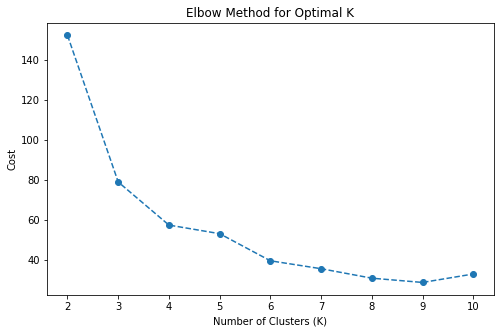

+-----------------+----------+
|         features|prediction|
+-----------------+----------+
|[5.1,3.5,1.4,0.2]|         1|
|[4.9,3.0,1.4,0.2]|         1|
|[4.7,3.2,1.3,0.2]|         1|
|[4.6,3.1,1.5,0.2]|         1|
|[5.0,3.6,1.4,0.2]|         1|
|[5.4,3.9,1.7,0.4]|         1|
|[4.6,3.4,1.4,0.3]|         1|
|[5.0,3.4,1.5,0.2]|         1|
|[4.4,2.9,1.4,0.2]|         1|
|[4.9,3.1,1.5,0.1]|         1|
+-----------------+----------+
only showing top 10 rows



In [0]:

# Apply the Elbow Method to find optimal K
cost = []
k_values = range(2, 11)  # Testing k from 2 to 10

for k in k_values:
    kmeans = KMeans(k=k, seed=1, featuresCol="features")
    model = kmeans.fit(df_features)
    cost.append(model.summary.trainingCost)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, cost, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Cost")
plt.title("Elbow Method for Optimal K")
plt.show()

# Train final KMeans model with optimal K (choose based on the elbow point, e.g., 3)
optimal_k = 3  # Adjust this based on the elbow method result
kmeans = KMeans(k=optimal_k, seed=1, featuresCol="features")
kmeans_model = kmeans.fit(df_features)

# Assign clusters to the data
df_clustered = kmeans_model.transform(df_features)
df_clustered.show(10)
